In [1]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

# For visualisation

import seaborn as sns

import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings(action='ignore')

# Dataset Loading

In [2]:
# reading the datasest
df  = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Checking null values

In [6]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [7]:
# dropping the unwanted columns
df.drop(['instant','dteday','casual','registered','atemp'],axis=1,inplace=True)

In [8]:
# Encoding/mapping the season column
df.season = df.season.map({1:"spring",2:"summer",3:"fall",4:"winter"})

In [9]:
# Encoding/mapping the month column
df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [10]:
# Encoding/mapping the weekday column
df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [11]:
# Encoding/mapping the weathersit column
df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [12]:
# Encoding/mapping the yr column
df.yr = df.yr.map({0:'2018', 1:'2019'})

In [13]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,2018,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,spring,2018,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,spring,2018,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,2018,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,2018,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


In [14]:
# splitting the varaible into categorical and continous columns 
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont_cols = ['temp','hum','windspeed']
target = ['cnt']
len(cat_cols) + len(cont_cols) + len(target) # checking wheather all columns we take

11

# Visualising the Data(EDA)

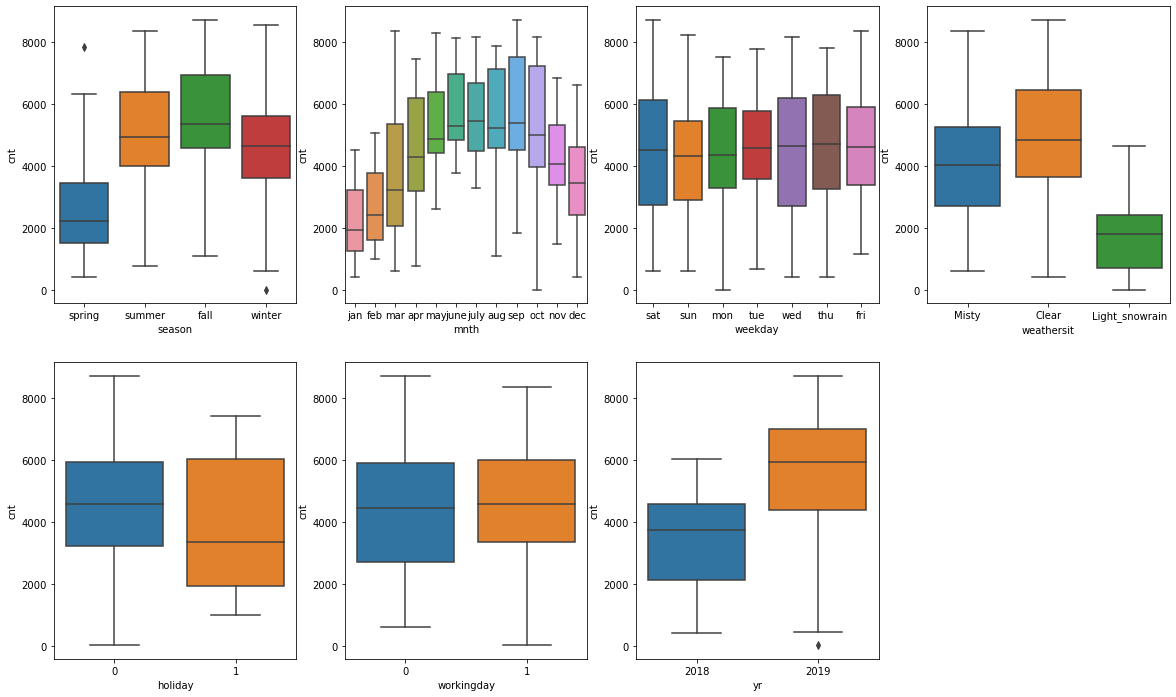

In [15]:
# visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

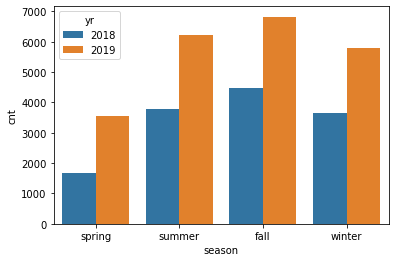

In [16]:
## plotting visualization for season column
sns.barplot(df['season'],df['cnt'],hue=df['yr'],ci=None)
plt.show()

 From the above graph we conclude that Fall season seems to have attracted more booking. And, in each season the booking count has increased  from 2018 to 2019.

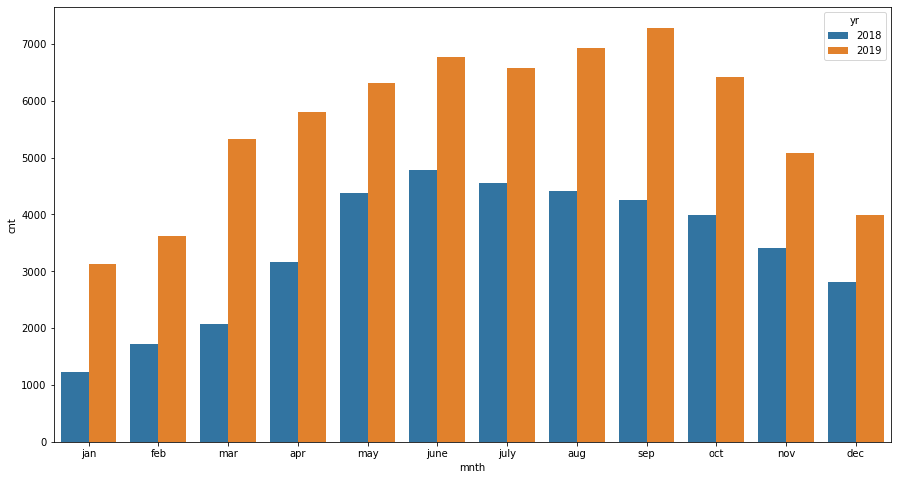

In [17]:
## plotting visualization for month column
plt.figure(figsize=[15,8])
sns.barplot(df['mnth'],df['cnt'],hue=df['yr'],ci=None)
plt.show()

From the above graph we conclude taht Most of the bookings has been done during the month of may, june, july, aug, sep and oct . Number of booking for each month seems to have increased from 2018 to 2019.


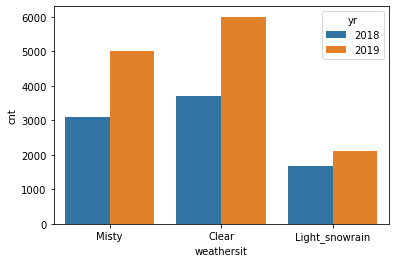

In [18]:
# plotting visualization for weathersit column
sns.barplot(df['weathersit'],df['cnt'],hue=df['yr'],ci=None)
plt.show()

From the above graph we conclude that , In comparison to previous year, i.e 2018, booking increased for each weather situation in 2019. Clear weather seems to have attracted more booking .

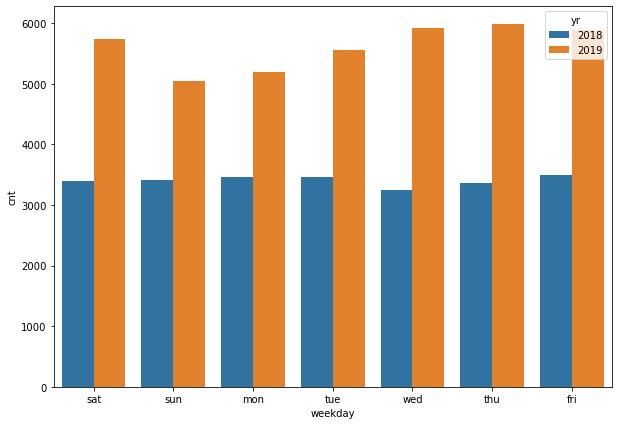

In [19]:
# plotting visualization for weekday column
plt.figure(figsize=[10,7])
sns.barplot(df['weekday'],df['cnt'],hue=df['yr'],ci=None)
plt.show()

From the above graph we conclude that wed,thu, Fri and Sat have more number of bookings as compared to the start of the week.

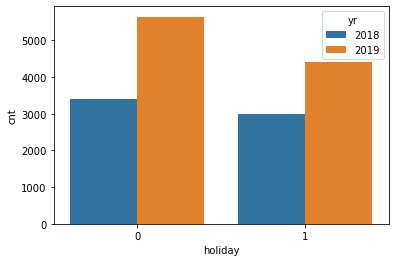

In [20]:
# plotting visualization for holiday column
sns.barplot(df['holiday'],df['cnt'],hue=df['yr'],ci=None)
plt.show()

From the above graph we conclude that When its not holiday, booking seems to be less in number .

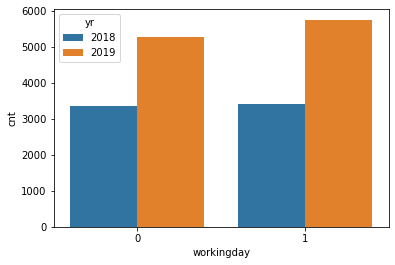

In [21]:
# plotting visualization for workingday column
sns.barplot(df['workingday'],df['cnt'],hue=df['yr'],ci=None)
plt.show()

From the above graph we conclude that Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.



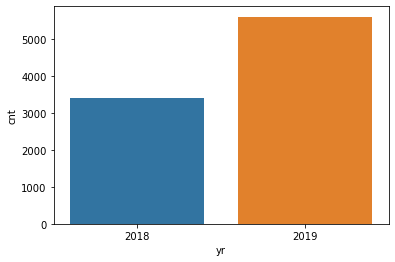

In [22]:
# plotting visualization for year column
sns.barplot(df['yr'],df['cnt'],ci=None)
plt.show()

 Fro the above graph we conclude that 2019 attracted more number of booking from 2018, which shows good progress in terms of business.

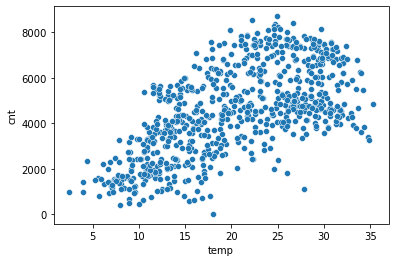

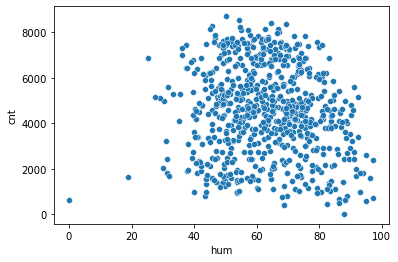

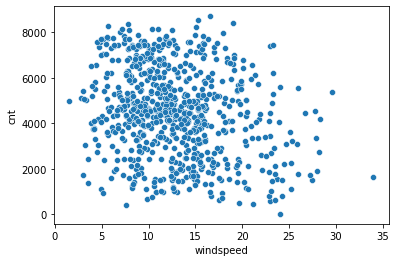

In [23]:
# Analysing/visualizing the numerical columns

for i in cont_cols:
    sns.scatterplot(df[i],df["cnt"])
    plt.show()

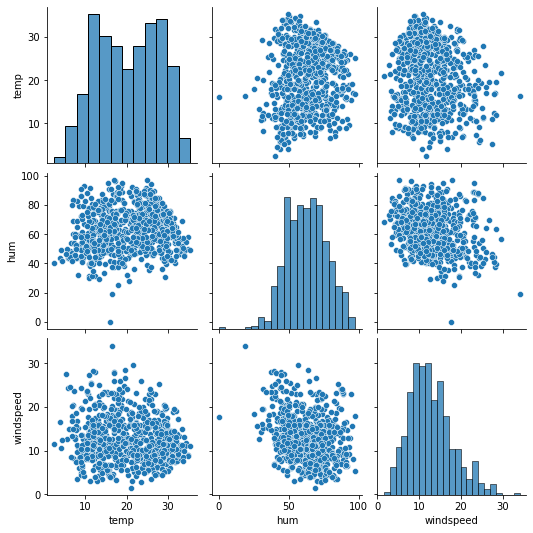

In [24]:
sns.pairplot(df[cont_cols])
plt.show()

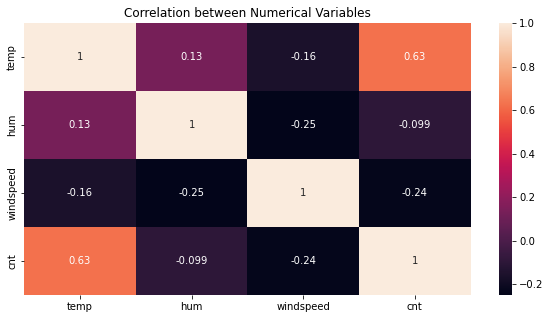

In [25]:
# Checking the correlation between the numerical variables
plt.figure(figsize=(10,5))
sns.heatmap(df[cont_cols+["cnt"]].corr(),annot=True)
plt.title("Correlation between Numerical Variables")
plt.show()

# Dummy varaible creation

In [26]:
#Dummy variables for season, mnth, weekday, weathersit
dum1=pd.get_dummies(df.season,drop_first=True)
dum2=pd.get_dummies(df.mnth,drop_first=True)
dum3=pd.get_dummies(df.weekday,drop_first=True)
dum4=pd.get_dummies(df.weathersit,drop_first=True)

In [27]:
# Combining the results to dataframe
df1=pd.concat([dum1,dum2,dum3,dum4,df],axis=1)
df1.head()

,spring,summer,winter,aug,dec,feb,jan,july,june,mar,...,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,2018,jan,0,sat,0,Misty,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,2018,jan,0,sun,0,Misty,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,2018,jan,0,mon,1,Clear,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,2018,jan,0,tue,1,Clear,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,2018,jan,0,wed,1,Clear,9.305237,43.6957,12.522300,1600


In [28]:
# Drop 'season','mnth','weekday','weathersit' 
df1.drop(['season','mnth','weekday','weathersit'],axis=1,inplace=True)
df1.head()

,spring,summer,winter,aug,dec,feb,jan,july,june,mar,...,wed,Light_snowrain,Misty,yr,holiday,workingday,temp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,2018,0,0,14.110847,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,0,1,2018,0,0,14.902598,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,2018,0,1,8.050924,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,2018,0,1,8.200000,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,1,0,0,2018,0,1,9.305237,43.6957,12.522300,1600


# Train-test split

In [29]:
# splitting the independent and dependent varaible 
x=df1.drop(["cnt"],axis=1)
y=df1["cnt"]

In [30]:
# code for taking train and test data 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [31]:
x_train.shape

(511, 28)

In [32]:
x_test.shape

(219, 28)

# Scaling

In [33]:
# import the library for scaling
from sklearn.preprocessing import MinMaxScaler

In [34]:
# taking function in scaler varaible
scaler = MinMaxScaler()

In [35]:
# scaling  the varaible into MinMaxScaler
x_train[cont_cols] = scaler.fit_transform(x_train[cont_cols])
x_train.head()

,spring,summer,winter,aug,dec,feb,jan,july,june,mar,...,tue,wed,Light_snowrain,Misty,yr,holiday,workingday,temp,hum,windspeed
653,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,2019,0,1,0.509887,0.575354,0.300794
576,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,2019,0,1,0.815169,0.725633,0.264686
426,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,2019,0,0,0.442393,0.640189,0.255342
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,2019,0,0,0.245101,0.498067,0.663106
482,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,2019,0,0,0.395666,0.504508,0.188475


In [36]:
# checking whether scaling done properly
x_test[cont_cols] = scaler.fit_transform(x_test[cont_cols])
x_test.head(5)

,spring,summer,winter,aug,dec,feb,jan,july,june,mar,...,tue,wed,Light_snowrain,Misty,yr,holiday,workingday,temp,hum,windspeed
184,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,2018,1,0,0.837241,0.534223,0.149393
535,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,2019,0,1,0.911423,0.470417,0.231142
299,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,2018,0,1,0.496221,0.777843,0.443398
221,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,2018,0,1,0.890387,0.236659,0.449707
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,2018,0,1,0.821739,0.070765,0.682387


# Modelling

### Feature Selection

In [37]:
# import library  of RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# here taking estimator for linear regression and RFE to select number of feature to choose by dropping other
estimator = LinearRegression()
selector = RFE(estimator,n_features_to_select = 15)

# selector select the feature we want from train data
selector = selector.fit(x_train,y_train)
selected_features = list(x_train.columns[selector.support_])
selected_features

['spring',
 'summer',
 'winter',
 'jan',
 'july',
 'sep',
 'sat',
 'Light_snowrain',
 'Misty',
 'yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed']

In [38]:
# taking the feature in train an test data we choose by RFE
x_train = x_train[selected_features]
x_test = x_test[selected_features]

In [39]:
# adding the constant feature to data
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
x_test_sm = sm.add_constant(x_test)

In [40]:
# making model for prediction
model1=sm.OLS(y_train.astype(float),x_train_sm.astype(float))
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.5
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.50e-191
Time:                        17:39:57   Log-Likelihood:                -4114.8
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     495   BIC:                             8329.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.049e+06   1.41e+05    -28.817      0.000   -4.33e+06   -3.77e+06
spring          -439.3779    179.750     -2.444      0.015    -792.545     -86.211
summer           442.3136    129.046      3.428      0.001     188.768     695.859
winter           823.3397    150.044      5.487      0.000     528.538    1118.142
jan             -298.4753    150.964     -1.977      0.049    -595.085      -1.865
july            -461.8136    157.127     -2.939      0.003    -770.531    -153.096
sep              705.8967    143.243      4.928      0.000     424.457     987.336
sat              466.0363    126.162      3.694      0.000     218.158     713.914
Light_snowrain -2154.6073    226.496     -9.513      0.000   -2599.620   -1709.594
Misty           -492.1456     90.091     -5.463      0.000    -669.154    -315.137
yr              2007.6643     69.617     28.839      0.000    1870.884    2144.445
holiday         -506.7813    233.946     -2.166      0.031    -966.431     -47.132
workingday       380.7061    100.209      3.799      0.000     183.819     577.594
temp            4437.9745    298.850     14.850      0.000    3850.804    5025.145
hum            -1366.6057    324.706     -4.209      0.000   -2004.578    -728.633
windspeed      -1619.1366    221.733     -7.302      0.000   -2054.791   -1183.482
==============================================================================
Omnibus:                       66.238   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.707
Skew:                          -0.677   Prob(JB):                     2.09e-35
Kurtosis:                       5.381   Cond. No.                     8.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# variance inflaton factor

In [41]:
# Here importing the library to finding VIF to check multicolinearity  
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=x_train.columns

vif_data["VIF"]=[variance_inflation_factor(x_train.astype(float).values,i) for i in range(len(x_train.astype(float).columns))]
vif_data

,Feature,VIF
0,spring,6.694648
1,summer,3.511726
2,winter,4.768126
3,jan,1.715365
4,july,1.612375
5,sep,1.410328
6,sat,2.106512
7,Light_snowrain,1.290019
8,Misty,2.386548
9,yr,84.014513


In [42]:
# dropping the workingday as it have VIF very high 
x_train=x_train.drop(["workingday"],axis=1)
x_test=x_test.drop(["workingday"],axis=1)

In [43]:
# again adding the changes in update in x_data
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [45]:
model2=sm.OLS(y_train.astype(float),x_train_sm.astype(float))
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     191.5
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.27e-189
Time:                        17:40:38   Log-Likelihood:                -4122.1
No. Observations:                 511   AIC:                             8274.
Df Residuals:                     496   BIC:                             8338.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -4.05e+06   1.42e+05    -28.438      0.000   -4.33e+06   -3.77e+06
spring          -447.8754    182.154     -2.459      0.014    -805.763     -89.988
summer           438.7615    130.779      3.355      0.001     181.813     695.710
winter           807.9413    152.007      5.315      0.000     509.284    1106.598
jan             -290.8090    152.981     -1.901      0.058    -591.380       9.762
july            -488.3539    159.083     -3.070      0.002    -800.913    -175.795
sep              714.6556    145.151      4.924      0.000     429.469     999.842
sat              151.2627     96.421      1.569      0.117     -38.182     340.707
Light_snowrain -2093.2109    228.958     -9.142      0.000   -2543.058   -1643.364
Misty           -464.4912     91.005     -5.104      0.000    -643.294    -285.689
yr              2008.1037     70.553     28.462      0.000    1869.484    2146.723
holiday         -815.5683    222.324     -3.668      0.000   -1252.381    -378.756
temp            4466.7947    302.772     14.753      0.000    3871.921    5061.669
hum            -1444.5268    328.417     -4.398      0.000   -2089.787    -799.267
windspeed      -1640.4361    224.644     -7.302      0.000   -2081.807   -1199.065
==============================================================================
Omnibus:                       64.507   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.307
Skew:                          -0.699   Prob(JB):                     9.27e-31
Kurtosis:                       5.130   Cond. No.                     8.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=x_train.columns

vif_data["VIF"]=[variance_inflation_factor(x_train.astype(float).values,i) for i in range(len(x_train.astype(float).columns))]
vif_data

,Feature,VIF
0,spring,6.693618
1,summer,3.511544
2,winter,4.764648
3,jan,1.715055
4,july,1.609179
5,sep,1.409962
6,sat,1.197259
7,Light_snowrain,1.283452
8,Misty,2.370891
9,yr,76.644333


In [48]:
# dropping the Humidity as it have VIF very high 
x_train=x_train.drop(["hum"],axis=1)
x_test=x_test.drop(["hum"],axis=1)

In [49]:
# again adding the changes in update in x_data
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [50]:
model3=sm.OLS(y_train.astype(float),x_train_sm.astype(float))
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.4
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.12e-186
Time:                        17:41:04   Log-Likelihood:                -4131.9
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     497   BIC:                             8351.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.125e+06   1.44e+05    -28.649      0.000   -4.41e+06   -3.84e+06
spring          -531.8072    184.465     -2.883      0.004    -894.234    -169.381
summer           380.4966    132.486      2.872      0.004     120.196     640.797
winter           668.8065    151.399      4.418      0.000     371.347     966.267
jan             -333.6454    155.463     -2.146      0.032    -639.092     -28.199
july            -443.5813    161.660     -2.744      0.006    -761.203    -125.959
sep              660.2348    147.268      4.483      0.000     370.891     949.579
sat              172.0326     98.067      1.754      0.080     -20.644     364.710
Light_snowrain -2491.0681    214.180    -11.631      0.000   -2911.878   -2070.259
Misty           -694.0854     75.910     -9.144      0.000    -843.229    -544.942
yr              2044.8505     71.338     28.664      0.000    1904.690    2185.011
holiday         -816.3866    226.390     -3.606      0.000   -1261.186    -371.587
temp            4122.1149    297.804     13.842      0.000    3537.005    4707.225
windspeed      -1363.5304    219.586     -6.210      0.000   -1794.962    -932.098
==============================================================================
Omnibus:                       66.075   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.268
Skew:                          -0.713   Prob(JB):                     1.28e-31
Kurtosis:                       5.155   Cond. No.                     8.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=x_train.columns

vif_data["VIF"]=[variance_inflation_factor(x_train.astype(float).values,i) for i in range(len(x_train.astype(float).columns))]
vif_data

,Feature,VIF
0,spring,6.628286
1,summer,3.478390
2,winter,4.571364
3,jan,1.709201
4,july,1.603302
5,sep,1.399634
6,sat,1.194835
7,Light_snowrain,1.079656
8,Misty,1.596215
9,yr,56.172190


In [52]:
# dropping the spring as it have VIF very high 
x_train=x_train.drop(["spring"],axis=1)
x_test=x_test.drop(["spring"],axis=1)

In [53]:
# again adding the changes in update in x_data
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [55]:
model4=sm.OLS(y_train.astype(float),x_train_sm.astype(float))
res4=model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.1
Date:                Thu, 04 May 2023   Prob (F-statistic):          4.57e-186
Time:                        17:44:15   Log-Likelihood:                -4136.2
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     498   BIC:                             8353.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.106e+06   1.45e+05    -28.341      0.000   -4.39e+06   -3.82e+06
summer           639.9241     97.948      6.533      0.000     447.482     832.366
winter           999.2573     99.635     10.029      0.000     803.501    1195.014
jan             -387.7236    155.456     -2.494      0.013    -693.155     -82.292
july            -349.0531    159.458     -2.189      0.029    -662.347     -35.760
sep              777.2922    142.595      5.451      0.000     497.130    1057.455
sat              173.5748     98.783      1.757      0.080     -20.508     367.657
Light_snowrain -2474.5653    215.669    -11.474      0.000   -2898.299   -2050.831
Misty           -686.9171     76.424     -8.988      0.000    -837.070    -536.764
yr              2035.2593     71.781     28.354      0.000    1894.228    2176.291
holiday         -834.5481    227.957     -3.661      0.000   -1282.425    -386.671
temp            4710.3102    218.524     21.555      0.000    4280.968    5139.652
windspeed      -1420.6760    220.289     -6.449      0.000   -1853.487    -987.865
==============================================================================
Omnibus:                       58.681   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.408
Skew:                          -0.680   Prob(JB):                     3.90e-25
Kurtosis:                       4.852   Cond. No.                     8.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=x_train.columns

vif_data["VIF"]=[variance_inflation_factor(x_train.astype(float).values,i) for i in range(len(x_train.astype(float).columns))]
vif_data

,Feature,VIF
0,summer,1.875301
1,winter,1.954864
2,jan,1.683459
3,july,1.536390
4,sep,1.292734
5,sat,1.194779
6,Light_snowrain,1.078724
7,Misty,1.594443
8,yr,23.062859
9,holiday,1.047799


In [58]:
# dropping the winter as it have some outlier
x_train=x_train.drop(["winter"],axis=1)
x_test=x_test.drop(["winter"],axis=1)

In [59]:
x_train_sm=sm.add_constant(x_train)
x_test_sm=sm.add_constant(x_test)

In [61]:
model5=sm.OLS(y_train.astype(float),x_train_sm.astype(float))
res5=model5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     183.4
Date:                Thu, 04 May 2023   Prob (F-statistic):          2.11e-167
Time:                        17:44:54   Log-Likelihood:                -4183.2
No. Observations:                 511   AIC:                             8390.
Df Residuals:                     499   BIC:                             8441.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4.139e+06   1.59e+05    -26.090      0.000   -4.45e+06   -3.83e+06
summer           254.0778     98.655      2.575      0.010      60.247     447.909
jan             -999.4077    156.612     -6.381      0.000   -1307.109    -691.707
july            -600.6177    172.472     -3.482      0.001    -939.478    -261.757
sep              627.4048    155.317      4.040      0.000     322.249     932.561
sat              187.1349    108.182      1.730      0.084     -25.413     399.682
Light_snowrain -2259.7204    235.043     -9.614      0.000   -2721.517   -1797.924
Misty           -657.8890     83.643     -7.865      0.000    -822.225    -493.553
yr              2051.9477     78.597     26.107      0.000    1897.525    2206.370
holiday         -764.6810    249.553     -3.064      0.002   -1254.986    -274.376
temp            4135.1065    230.948     17.905      0.000    3681.357    4588.856
windspeed      -1761.9121    238.376     -7.391      0.000   -2230.257   -1293.567
==============================================================================
Omnibus:                       15.680   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.325
Skew:                          -0.366   Prob(JB):                     0.000173
Kurtosis:                       3.527   Cond. No.                     8.23e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=x_train.columns

vif_data["VIF"]=[variance_inflation_factor(x_train.astype(float).values,i) for i in range(len(x_train.astype(float).columns))]
vif_data

,Feature,VIF
0,summer,1.585766
1,jan,1.425032
2,july,1.497906
3,sep,1.278389
4,sat,1.194577
5,Light_snowrain,1.068321
6,Misty,1.592190
7,yr,17.714775
8,holiday,1.046840
9,temp,11.808404


So here we can see "yr" and "temp" has high vif values but we will keep them for our better prediction

# Model is ready

In [66]:
# R-SQUARE OF TEST DATA 
from sklearn.metrics import r2_score
predicted_value=res5.predict(x_test_sm.astype(float))
print("Test Performance:",round(r2_score(y_test, predicted_value)*100,2),"%")

Test Performance: 71.84 %


In [68]:
# R-SQUARE OF TRAIN DATA 
predicted_value1=res5.predict(x_train_sm.astype(float))
print("Train Performance:",round(r2_score(y_train, predicted_value1)*100,2),"%")

Train Performance: 80.17 %


# RESIDUAL ANALYSIS

In [86]:
lm = sm.OLS(y_train.astype(int),x_train.astype(float)).fit()
y_train_pred = lm.predict(x_train.astype(float))

Text(0.5, 0, 'Errors')

<Figure size 432x288 with 0 Axes>

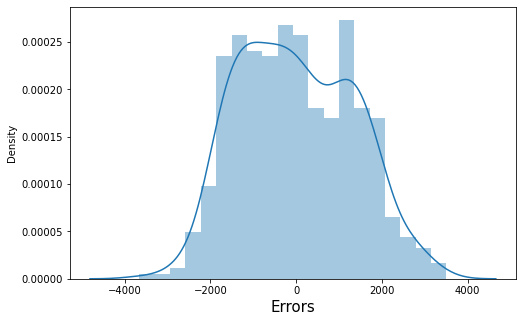

In [87]:
fig = plt.figure()
plt.figure(figsize=(8,5))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 15)               
plt.xlabel('Errors', fontsize = 15)

In [69]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2_score(y_test, predicted_value))*(x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1),4)
print(adjusted_r2)

0.7035


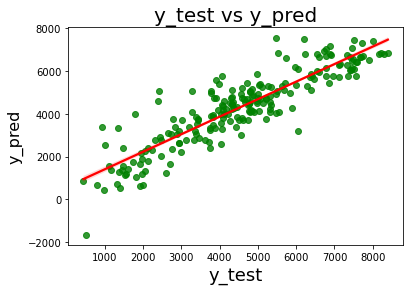

In [62]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=predicted_value, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

Train dataset R^2 : 0.801
    
Test dataset R^2 : 0.718
    
Train dataset Adjusted R^2 :0.797
    
Test dataset Adjusted R^2 : 0.703
    